species
Waterbuck                106961
Baboon                    87391
Warthog                   65206
Impala                    48537
Bushbuck                  37126
Oribi                     12064
Elephant                   8920
Nyala                      8825
Genet                      6924
Civet                      3571
Bushpig                    3542
Bird_other                 3444
Vervet_monkey              3439
Kudu                       3402
Wildebeest                 3246
Porcupine                  3222
Antelope                   2516
Reedbuck                   2328
Buffalo                    2196
Guineafowl_helmeted        1739
Duiker_red                 1483
Sable_antelope             1014
Hartebeest                  728
Mongoose_marsh              666
Hare                        605
Duiker_common               537
Honey_badger                471
Aardvark                    410
Ground_hornbill             360
Mongoose_white_tailed       339
Mongoose_slender            322


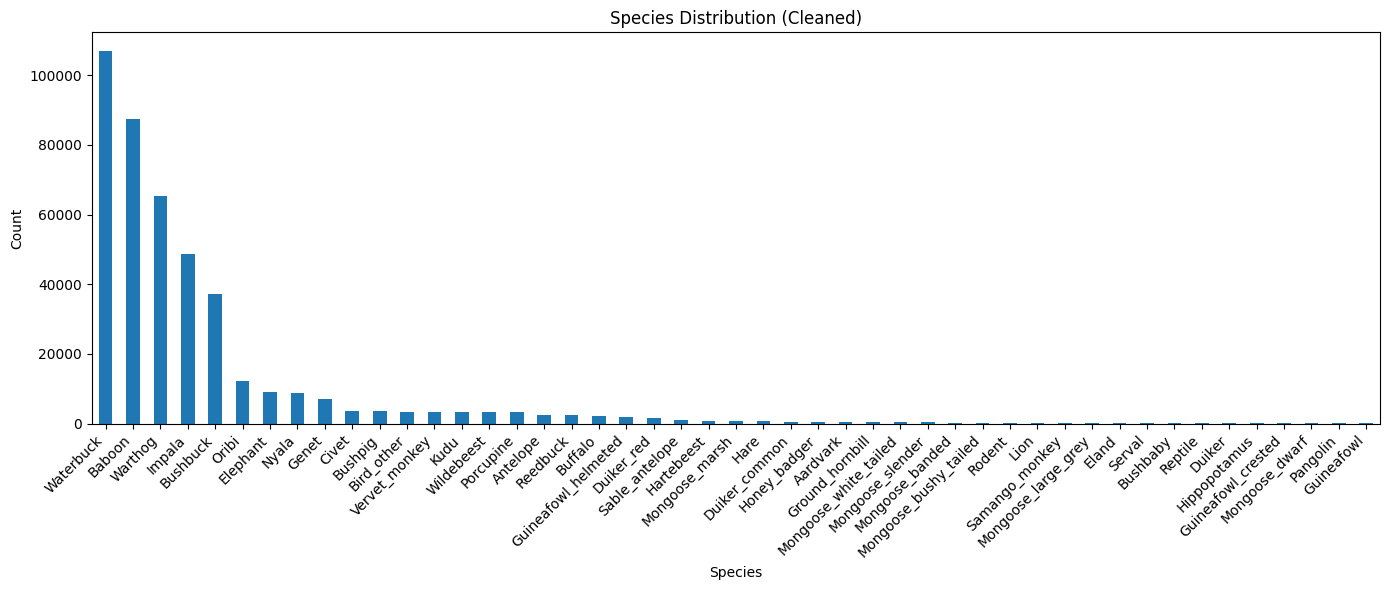

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your CSV
full_df = pd.read_csv('full_df_filtered.csv', low_memory=False)

# # Step 0: Filter out species labels that start with a number
# full_df_cleaned = full_df[~full_df['species'].str.match(r'^\d')]

# # Step 1: Convert species to lowercase
# full_df_cleaned.loc[:, 'species'] = full_df_cleaned['species'].str.lower()

# # Step 4: Remove unwanted labels
# unwanted = [
#     'unknown', 'invalid', 'birdofprey', 'nothing there', 'fire', 'rain',
#     'setup', 'flood', 'human', 'insect', 'bat', 'black', 'white', 'mongoose']

# # Normalize both sides to lowercase for consistency
# mask = ~full_df_cleaned['species'].str.lower().isin(unwanted)

# # Apply mask
# full_df_cleaned = full_df_cleaned[mask]
# full_df_cleaned = full_df_cleaned.drop_duplicates(subset='filepath', keep=False).reset_index(drop=True)

# (Optional) Reset display limit and show value counts
pd.set_option('display.max_rows', None)
species_counts = full_df['species'].str.capitalize().value_counts().sort_values(ascending=False)
print(species_counts)

# Plot
plt.figure(figsize=(14, 6))
species_counts.plot(kind='bar')
plt.title('Species Distribution (Cleaned)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Get top 10 species by count
top_10_species = species_counts.head(10).index.tolist()

# Filter only those species
filtered_df = full_df[full_df['species'].str.capitalize().isin(top_10_species)]

# Group by site and species, then count
species_site_counts = (
    filtered_df
    .groupby(['site', filtered_df['species'].str.capitalize()])
    .size()
    .unstack(fill_value=0)  # sites as rows, species as columns
)

pd.set_option("display.max_rows", None)  # so you can see all sites
print(species_site_counts)

species  Baboon  Bushbuck  Civet  Elephant  Genet  Impala  Nyala  Oribi  \
site                                                                      
A06          99        14      6         8     50     340      0     98   
A08        1806       127      8        73    216     184     10     44   
A10        1350       434     14       100     56     300    840      0   
B05         154        25     18        51     20     376      4    225   
B07         852       164     38        44     22    1761    298    246   
B09        1727       138     16        65    214     534    170     57   
C06        1353      3286     12        69     90    1012     59   3106   
C08         848       304     28        68    151     410    369    108   
D03         666      1597     44        48     80     117     29     42   
D05        1078       404     35       132     16    1641    829    105   
D07        2026      1275     10       334     68    3985   1133    140   
D09          97        11

In [5]:
import pandas as pd
import os

# Paths
base_dir = os.path.expanduser("~/Desktop/Kaitlyn_Catalyst/ct_classifier")
train_filtered_path = os.path.join(base_dir, "speciesnet/train_filtered.csv")
val_filtered_path = os.path.join(base_dir, "speciesnet/val_filtered.csv")

# Load data
train_filtered_df = pd.read_csv(train_filtered_path)
val_filtered_df = pd.read_csv(val_filtered_path)

# Top 10 species list
top_10_species = [
    "waterbuck", "warthog", "baboon", "impala", "bushbuck",
    "wildebeest", "elephant", "nyala", "oribi", "buffalo"
]

# Filter to top 10 species
train_top10 = train_filtered_df[train_filtered_df['species'].isin(top_10_species)]
val_top10 = val_filtered_df[val_filtered_df['species'].isin(top_10_species)]

# Count species × site in train
train_counts = (
    train_top10.groupby(['species', 'site'])
    .size()
    .reset_index(name='count')
    .sort_values(['species', 'count'], ascending=[True, False])
)

# Count species × site in val
val_counts = (
    val_top10.groupby(['species', 'site'])
    .size()
    .reset_index(name='count')
    .sort_values(['species', 'count'], ascending=[True, False])
)

In [10]:
# Merge train and val counts by species
species_split = (
    pd.merge(
        train_counts.groupby("species")["count"].sum().reset_index(name="train_count"),
        val_counts.groupby("species")["count"].sum().reset_index(name="val_count"),
        on="species",
        how="outer"
    )
)

# Compute ratios
species_split["train_ratio"] = species_split["train_count"] / (species_split["train_count"] + species_split["val_count"])
species_split["val_ratio"] = species_split["val_count"] / (species_split["train_count"] + species_split["val_count"])

# Round for readability
species_split[["species", "train_count", "val_count", "train_ratio", "val_ratio"]] = \
    species_split[["species", "train_count", "val_count", "train_ratio", "val_ratio"]].round(3)

print(species_split)

      species  train_count  val_count  train_ratio  val_ratio
0      baboon         9044       5039        0.642      0.358
1     buffalo          562        131        0.811      0.189
2    bushbuck         4040       1925        0.677      0.323
3    elephant          959        779        0.552      0.448
4      impala         7071       3543        0.666      0.334
5       nyala         1161        444        0.723      0.277
6       oribi          585        439        0.571      0.429
7     warthog        10085       5436        0.650      0.350
8   waterbuck        14699       7668        0.657      0.343
9  wildebeest         2095         38        0.982      0.018


In [8]:
# Load data
train_filtered_df = pd.read_csv(train_filtered_path)
val_filtered_df = pd.read_csv(val_filtered_path)

# Top 10 species
top_10_species = [
    "waterbuck", "warthog", "baboon", "impala", "bushbuck",
    "wildebeest", "elephant", "nyala", "oribi", "buffalo"
]

# Collect overlaps
overlap_report = {}

for sp in top_10_species:
    train_sites = set(train_filtered_df.loc[train_filtered_df['species'] == sp, 'site'])
    val_sites = set(val_filtered_df.loc[val_filtered_df['species'] == sp, 'site'])
    overlap = train_sites.intersection(val_sites)
    if overlap:
        overlap_report[sp] = list(overlap)

# Print results
if overlap_report:
    print("⚠️ Overlap found (these sites appear in both train & val for the same species):")
    for sp, sites in overlap_report.items():
        print(f"{sp}: {sites}")
else:
    print("✅ No overlaps — sites per species are cleanly split between train and validation.")

✅ No overlaps — sites per species are cleanly split between train and validation.


## Prepare labels

In [2]:
# === Map UUIDs ===
import torch
import torch.nn as nn
import pandas as pd
from speciesnet.classifier import SpeciesNetClassifier
import os

classifier_model_name = os.path.expanduser("~/.cache/kagglehub/models/google/speciesnet/pyTorch/v4.0.1a/1")
base_dir = os.path.expanduser("~/Desktop/Kaitlyn_Catalyst/ct_classifier")
target_species_txt = os.path.join(base_dir, "target_species.txt")
label_mapping_path = os.path.join(base_dir, "species_with_label_matching.csv")

In [10]:
model = SpeciesNetClassifier(model_name=classifier_model_name, target_species_txt=target_species_txt)
original_num_classes = len(model.labels)
# new_label_index = max(model.labels.keys()) + 1  # Get the next integer key
# model.labels[new_label_index] = "Mongoose"
print(len(model.labels))
# model.target_labels.append("Mongoose")
uuid_to_idx = {uuid: idx for idx, uuid in enumerate(model.target_labels)}
uuid_to_idx

2498


{'55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant': 0,
 '7631afd3-ab8e-4e88-9243-2c21386595eb;mammalia;cetartiodactyla;hippopotamidae;hippopotamus;amphibius;hippopotamus': 1,
 '9732cefb-6a08-49f6-b61e-b9a9054368c4;mammalia;cetartiodactyla;bovidae;syncerus;caffer;african buffalo': 2,
 '6ffe2064-cabd-4fcb-8c1b-f168bf381aab;mammalia;cetartiodactyla;bovidae;tragelaphus;oryx;common eland': 3,
 '2032f6c0-3537-4316-a0d7-1e754d42ed80;mammalia;cetartiodactyla;bovidae;hippotragus;niger;sable antelope': 4,
 'd2e4f2d3-7182-48d1-a866-535904fe7692;mammalia;cetartiodactyla;bovidae;tragelaphus;strepsiceros;greater kudu': 5,
 'b0f1b993-d62c-4b55-b833-5e575a15df05;mammalia;cetartiodactyla;bovidae;kobus;ellipsiprymnus;waterbuck': 6,
 '09fbf931-bbf0-4959-9df6-1082db578281;mammalia;cetartiodactyla;bovidae;connochaetes;taurinus;common wildebeest': 7,
 'a6c4ef9a-d23f-49ca-97c6-4f859df0066e;mammalia;cetartiodactyla;bovidae;alcelaphus;buselaphus;harteb

In [11]:
label_mapping_path = os.path.join(base_dir, "species_with_label_matching.csv")
label_map_df = pd.read_csv(label_mapping_path)
label_map_df["CommName"] = label_map_df["CommName"].str.strip().str.lower()
species_to_uuid = dict(zip(label_map_df["CommName"], label_map_df["Matching_JSON_Entries"]))
species_to_uuid['hippopotamus'] = species_to_uuid.pop('hippo')
species_to_uuid

{'elephant': '55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant',
 'buffalo': '9732cefb-6a08-49f6-b61e-b9a9054368c4;mammalia;cetartiodactyla;bovidae;syncerus;caffer;african buffalo',
 'eland': '6ffe2064-cabd-4fcb-8c1b-f168bf381aab;mammalia;cetartiodactyla;bovidae;tragelaphus;oryx;common eland',
 'sable_antelope': '2032f6c0-3537-4316-a0d7-1e754d42ed80;mammalia;cetartiodactyla;bovidae;hippotragus;niger;sable antelope',
 'kudu': 'd2e4f2d3-7182-48d1-a866-535904fe7692;mammalia;cetartiodactyla;bovidae;tragelaphus;strepsiceros;greater kudu',
 'waterbuck': 'b0f1b993-d62c-4b55-b833-5e575a15df05;mammalia;cetartiodactyla;bovidae;kobus;ellipsiprymnus;waterbuck',
 'wildebeest': '09fbf931-bbf0-4959-9df6-1082db578281;mammalia;cetartiodactyla;bovidae;connochaetes;taurinus;common wildebeest',
 'hartebeest': 'a6c4ef9a-d23f-49ca-97c6-4f859df0066e;mammalia;cetartiodactyla;bovidae;alcelaphus;buselaphus;hartebeest',
 'lion': 'ddf59264-185a-4d35-b647-2

In [15]:
import json 

# Build full mapping
combined_mapping = {}
for species_name, uuid in species_to_uuid.items():
    class_id = uuid_to_idx.get(uuid)
    if class_id is not None:
        combined_mapping[str(class_id)] = {
            "short_name": species_name,
            "target_label": uuid
        }

# Save to JSON
with open("id_to_species_full.json", "w") as f:
    json.dump(combined_mapping, f, indent=2)

In [4]:
# Count how many filepaths are duplicated
num_duplicated_files = full_df['filepath'].duplicated(keep=False).sum()
num_unique_duplicated_files = full_df['filepath'].duplicated(keep=False).groupby(full_df['filepath']).sum().gt(1).sum()

print(f"Total duplicated rows: {num_duplicated_files}")
print(f"Number of unique filepaths that are duplicated: {num_unique_duplicated_files}")

Total duplicated rows: 840
Number of unique filepaths that are duplicated: 419


In [9]:
# Make sure the datetime column is parsed as datetime type
full_df_deduped['datetime'] = pd.to_datetime(full_df_deduped['datetime'], errors='coerce')

# Filter species starting with a number (as before)
species_with_number = full_df_deduped[full_df_deduped['species'].astype(str).str.match(r'^\d')]

# Extract year from datetime
species_with_number['year'] = species_with_number['datetime'].dt.year

# Count rows per year
year_counts = species_with_number['year'].value_counts().sort_index()

print("Number of species-with-number rows per year:")
print(year_counts)

/var/folders/dc/_grr_lq141g3_rxfxtd017rm0000gn/T/ipykernel_89983/2269305957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df_deduped['datetime'] = pd.to_datetime(full_df_deduped['datetime'], errors='coerce')


Number of species-with-number rows per year:
year
1970        23
2014       128
2015      7243
2016        16
2017        10
2018    244735
2019    185787
Name: count, dtype: int64


/var/folders/dc/_grr_lq141g3_rxfxtd017rm0000gn/T/ipykernel_89983/2269305957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_with_number['year'] = species_with_number['datetime'].dt.year


In [6]:
# Filter rows where species does NOT start with a number
labelled_species = full_df_deduped[~full_df_deduped['species'].astype(str).str.match(r'^\d')]

# Count those rows
num_labelled_species = labelled_species.shape[0]

print(f"Rows with labelled species (not starting with a number): {num_labelled_species}")

Rows with labelled species (not starting with a number): 461251


In [17]:
# Count unique species names
num_unique_labelled_species = labelled_species['species'].nunique()

print(f"Number of unique labelled species: {num_unique_labelled_species}")

num_unique_labelled_species - len(unwanted)

Number of unique labelled species: 61


47

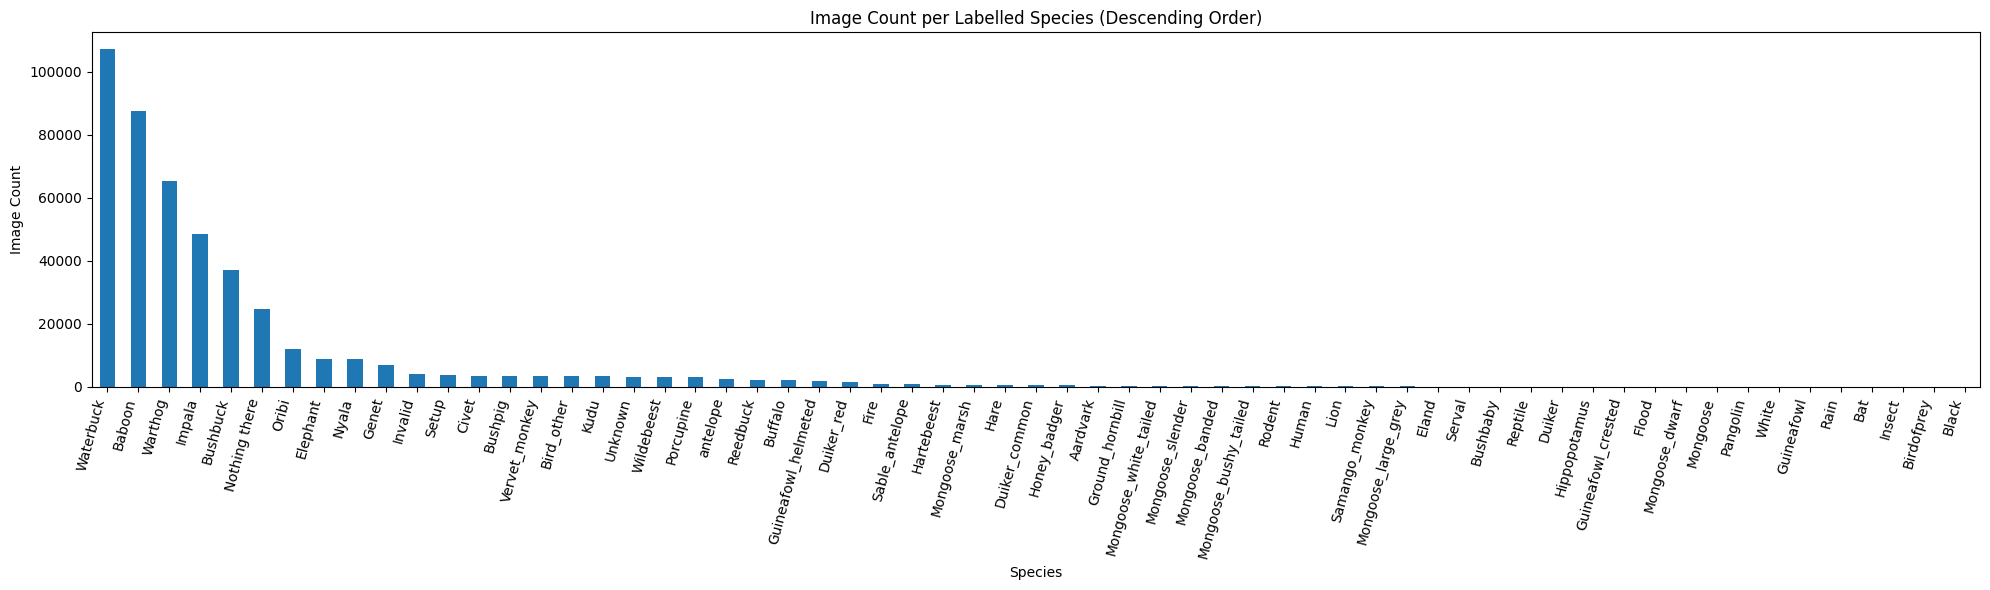

In [14]:
# Step 1: Drop duplicate filepaths (keep the first occurrence)
full_df_deduped = full_df.drop_duplicates(subset='filepath', keep='first')

# Step 2: Filter for labelled species (species not starting with a number)
labelled_species = full_df_deduped[~full_df_deduped['species'].astype(str).str.match(r'^\d')]

# Step 3: Count occurrences per species
species_counts = labelled_species['species'].value_counts()

# Plot with wider figure size
plt.figure(figsize=(20, 6))  # Wider figure
species_counts.plot(kind='bar')
plt.title('Image Count per Labelled Species (Descending Order)')
plt.xlabel('Species')
plt.ylabel('Image Count')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Define unwanted labels (case-insensitive match)
unwanted = [
    'unknown', 'invalid', 'birdofprey', 'nothing there', 'fire', 'rain',
    'setup', 'flood', 'human', 'insect', 'bat', 'black', 'white', 'mongoose'
]

# Filter out rows with species in unwanted list (case-insensitive contains)
labelled_species_filtered = labelled_species[
    ~labelled_species['species'].str.lower().str.contains('|'.join(unwanted))
]

# Count unique remaining species labels
num_remaining_labels = labelled_species_filtered['species'].nunique()

print(f"Number of remaining labelled species (after removing unwanted): {num_remaining_labels}")

Number of remaining labelled species (after removing unwanted): 40


In [ ]:
# from tqdm import tqdm

# # Convert UUID lookup dicts to Series for vectorized operations
# uuid_series = pd.Series(uuid_to_idx)

# # Preallocate new columns
# full_df_cleaned["ground_truth_label"] = full_df_cleaned["species"].replace(species_to_uuid)
# full_df_cleaned["ground_truth_index"] = None

# batch_size = 50000
# for start in tqdm(range(0, len(full_df_cleaned), batch_size)):
#     end = start + batch_size
#     batch = full_df_cleaned.loc[start:end, "ground_truth_label"]
#     full_df_cleaned.loc[start:end, "ground_truth_index"] = batch.map(uuid_to_idx)

In [ ]:
# full_df_cleaned["ground_truth_label"] = full_df_cleaned["species"].replace(species_to_uuid)
# full_df_cleaned["ground_truth_index"] = full_df_cleaned["ground_truth_label"].replace(uuid_to_idx)

In [ ]:
# full_df_cleaned.to_csv("full_df_filtered.csv")

## Download Images

In [2]:
import os
import re
from collections import Counter

# === Config ===
IMAGE_DIR = "../datasets/all_species_images"

# === Extract species from filename ===
def extract_species(filename):
    base = os.path.splitext(filename)[0]
    parts = base.split("_")

    # Find the last index where a part ends with a digit (site code)
    site_index = None
    for i, part in enumerate(parts):
        if part[-1].isdigit():
            site_index = i

    # If such a site code is found, return the rest as species
    if site_index is not None and site_index + 1 < len(parts):
        species_parts = parts[site_index + 1:]
        return "_".join(species_parts).lower()
    
    return "unknown"

# === Count species ===
def count_species(image_dir):
    species_counter = Counter()
    for fname in os.listdir(image_dir):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            species = extract_species(fname)
            species_counter[species] += 1
    return species_counter

# === Run and print summary ===
if __name__ == "__main__":
    species_counts = count_species(IMAGE_DIR)
    for species, count in sorted(species_counts.items(), key=lambda x: x[1]):
        print(f"{species}: {count}")

guineafowl: 31
pangolin: 42
mongoose_dwarf: 59
guineafowl_helmeted: 70
guineafowl_crested: 70
sable_antelope: 71
hippopotamus: 72
duiker: 97
reptile: 98
duiker_red: 102
bushbaby: 104
serval: 106
eland: 114
vervet_monkey: 122
civet: 130
bird_other: 131
kudu: 158
mongoose_large_grey: 171
genet: 176
samango_monkey: 176
lion: 178
antelope: 185
porcupine: 187
rodent: 203
mongoose_bushy_tailed: 251
reedbuck: 262
mongoose_banded: 286
mongoose_slender: 322
mongoose_white_tailed: 339
ground_hornbill: 360
aardvark: 410
honey_badger: 471
bushpig: 483
buffalo: 484
duiker_common: 537
oribi: 576
hare: 605
mongoose_marsh: 666
nyala: 726
wildebeest: 727
hartebeest: 728
elephant: 1012
bushbuck: 3795
impala: 5430
baboon: 8398
warthog: 9531
waterbuck: 14212


In [23]:
from sklearn.model_selection import StratifiedGroupKFold

def stratified_site_split(df, stratify_col="species", group_col="site", n_splits=2, random_state=42):
    df = df.copy()
    df["species_cleaned"] = df[stratify_col].str.strip().str.lower()
    df = df.dropna(subset=["species_cleaned", group_col])

    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_idx, val_idx in sgkf.split(df.index, df["species_cleaned"], df[group_col]):
        return df.iloc[train_idx].reset_index(drop=True), df.iloc[val_idx].reset_index(drop=True)

In [1]:
# stratified_site_split(full_df, stratify_col="species", group_col="site", n_splits=2, random_state=42)

In [8]:
import numpy as np
print("Unique labels in train set:", np.unique(train_filtered_df["label_column_name"]))

NameError: name 'train_filtered_df' is not defined